# Heart Disease Prediction Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("heart_disease_yes.csv")
df

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,Male,50,uneducated,1,1.0,0.0,no,1,0,313.0,179.0,92.0,25.97,66.0,86.0,yes
4234,Male,51,graduate,1,43.0,0.0,no,0,0,207.0,126.5,80.0,19.71,65.0,68.0,No
4235,Female,48,primaryschool,1,20.0,NaN,no,0,0,248.0,131.0,72.0,22.00,84.0,86.0,No
4236,Female,44,uneducated,1,15.0,0.0,no,0,0,210.0,126.5,87.0,19.16,86.0,NaN,No


In [3]:
df['education'].value_counts()

uneducated       1720
primaryschool    1253
graduate          687
postgraduate      473
Name: education, dtype: int64

In [4]:
df.isnull().sum()

Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
Heart_ stroke        0
dtype: int64

In [5]:
df[df['cigsPerDay'].isnull()]

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
131,Male,43,postgraduate,1,NaN,0.0,no,0,0,222.0,109.5,69.0,25.50,75.0,NaN,No
139,Male,49,postgraduate,1,NaN,0.0,no,0,0,256.0,127.5,81.5,28.21,93.0,85.0,yes
1046,Female,49,uneducated,1,NaN,0.0,no,0,0,280.0,120.0,80.0,22.33,90.0,75.0,No
1292,Male,42,graduate,1,NaN,0.0,no,0,0,225.0,122.5,80.0,25.54,90.0,90.0,No
1347,Female,58,postgraduate,1,NaN,0.0,no,1,0,270.0,195.0,117.5,23.35,75.0,NaN,No
1451,Male,54,uneducated,1,NaN,0.0,no,0,0,219.0,110.0,72.0,26.05,95.0,86.0,No
1497,Male,55,uneducated,1,NaN,0.0,no,0,0,214.0,132.5,85.5,29.25,70.0,103.0,No
1610,Female,61,uneducated,1,NaN,0.0,no,1,0,356.0,168.0,98.0,27.30,103.0,106.0,No
1625,Female,49,primaryschool,1,NaN,0.0,no,1,0,233.0,158.0,102.0,25.31,90.0,72.0,No
1870,Female,47,primaryschool,1,NaN,0.0,no,0,0,365.0,127.0,76.0,24.44,72.0,80.0,No


In [6]:
df = df.fillna({'cigsPerDay':5})

In [7]:
df = df.dropna(subset=['heartRate', 'totChol', 'education', 'BPMeds'])

In [8]:
df.BMI.unique()

array([26.97, 28.73, 25.34, ..., 39.17, 26.7 , 43.67])

In [9]:
df['BMI'] = df.BMI.fillna(value=df['BMI'].mean())

In [10]:
df['glucose'] = df.glucose.fillna(value=df['glucose'].mean())

In [11]:
df.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
Heart_ stroke      0
dtype: int64

In [12]:
df.shape

(4031, 16)

In [13]:
df['Heart_ stroke'].unique()

array(['No', 'yes'], dtype=object)

In [14]:
df

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232,Male,68,uneducated,0,0.0,0.0,no,1,0,176.0,168.0,97.0,23.14,60.0,79.000000,yes
4233,Male,50,uneducated,1,1.0,0.0,no,1,0,313.0,179.0,92.0,25.97,66.0,86.000000,yes
4234,Male,51,graduate,1,43.0,0.0,no,0,0,207.0,126.5,80.0,19.71,65.0,68.000000,No
4236,Female,44,uneducated,1,15.0,0.0,no,0,0,210.0,126.5,87.0,19.16,86.0,81.909263,No


In [15]:
import warnings
warnings.filterwarnings("ignore")

<Axes: xlabel='glucose'>

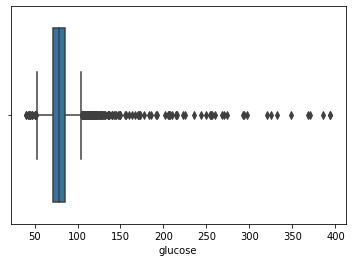

In [16]:
sns.boxplot(df['glucose'])

# Histogram plot of some data according to heart stroke

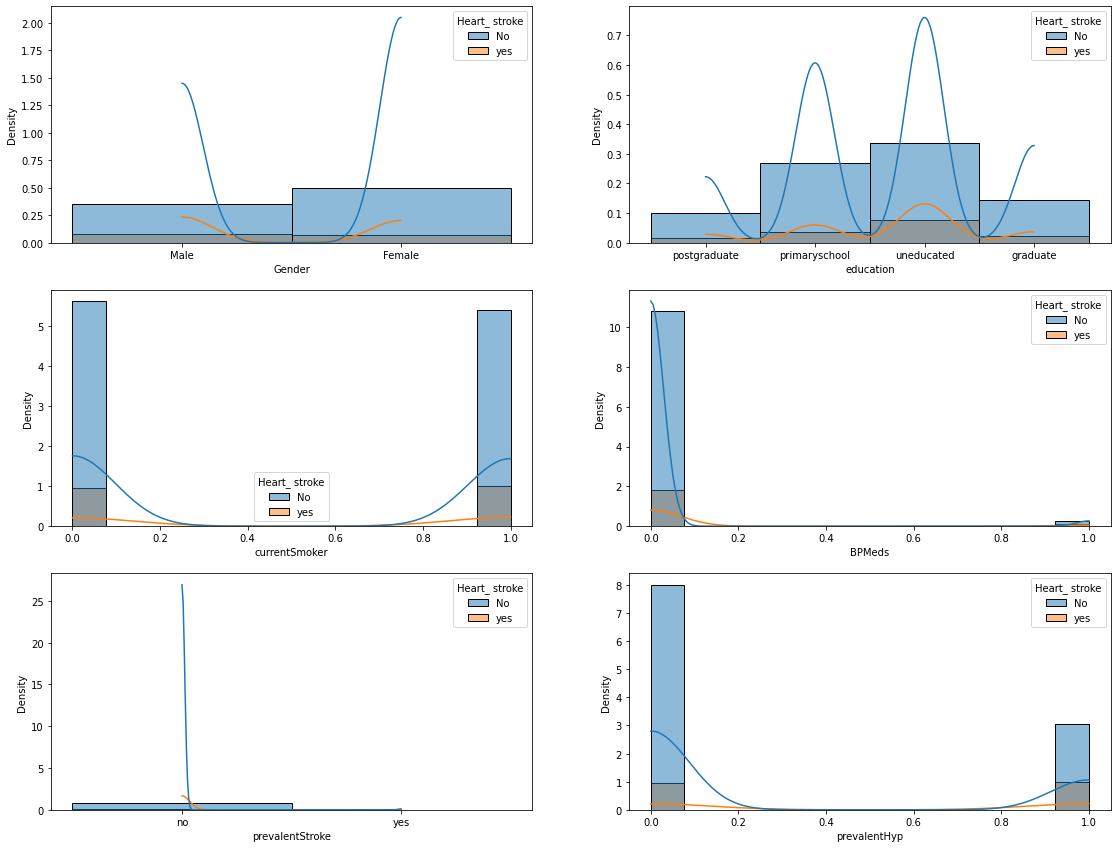

In [17]:
hist = ['Gender','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp']
plt.figure(figsize=(19,20))
for i in range(0,len(hist)):
    plt.subplot(4,2,i+1)
    sns.histplot(data=df, x=hist[i], hue='Heart_ stroke',kde=True, stat="density")
    if i == 5:
        plt.show()

# Scatter plot of cigarettes per day verses age

<Axes: xlabel='cigsPerDay', ylabel='age'>

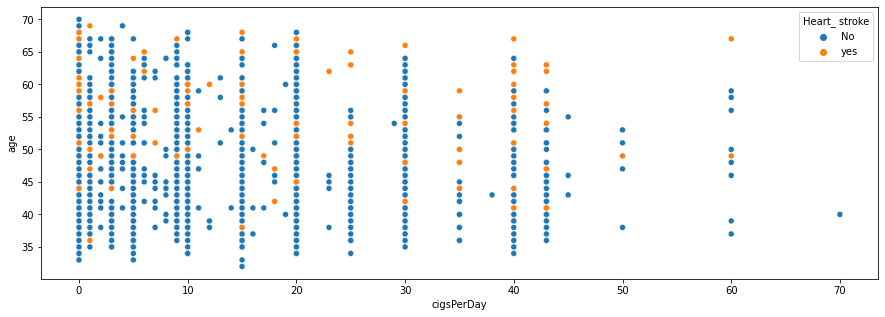

In [18]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df, x='cigsPerDay', y='age', hue='Heart_ stroke')

# KDE plot

In [19]:
def kde_plot(index):
    facet = sns.FacetGrid(df, hue='Heart_ stroke',aspect=4)
    facet.map(sns.kdeplot,index,fill= True)
    facet.set(xlim=(0, df[index].max()))
    facet.add_legend()
    plt.show()

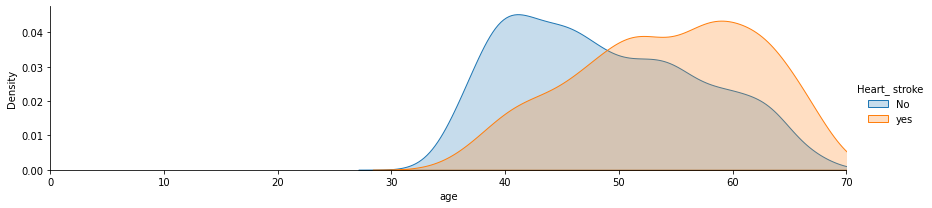

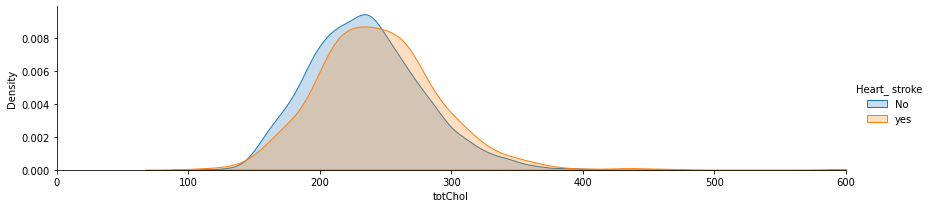

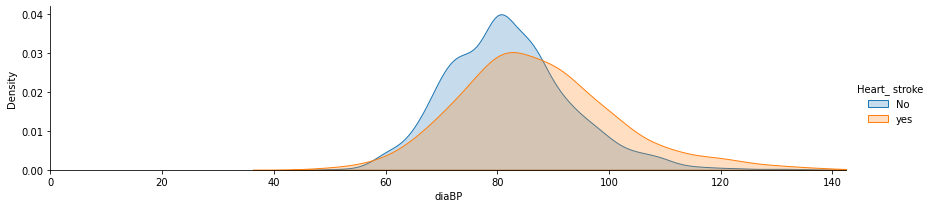

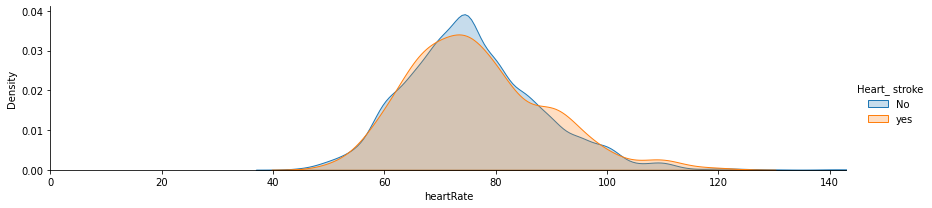

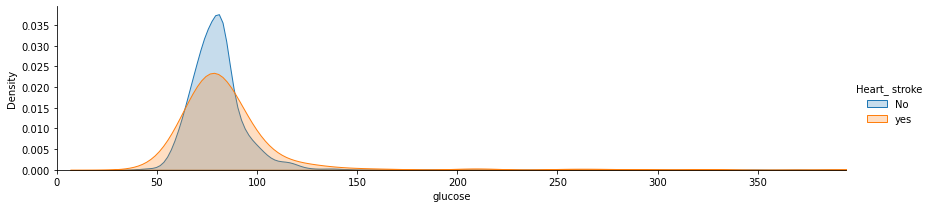

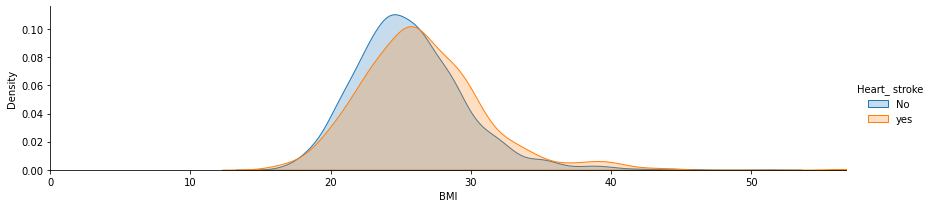

In [20]:
kde_plot('age')
kde_plot('totChol')
kde_plot('diaBP')
kde_plot('heartRate')
kde_plot('glucose')
kde_plot('BMI')

<Axes: title={'center': 'Stroke Distribution'}>

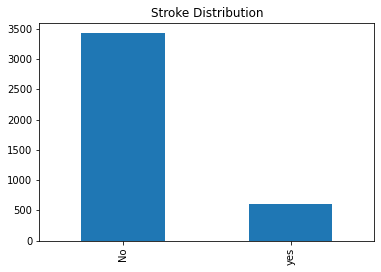

In [21]:
df['Heart_ stroke'].value_counts().plot(kind='bar', title='Stroke Distribution')

Text(0, 0.5, 'Count')

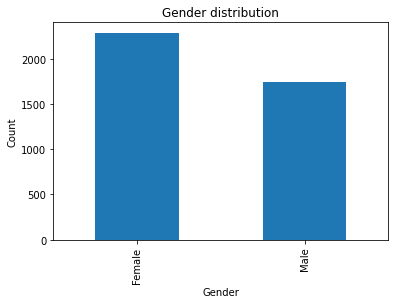

In [22]:
ax = df['Gender'].value_counts().plot(kind='bar',title='Gender distribution')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')

In [23]:
numeric_columns = df.select_dtypes(exclude='object')

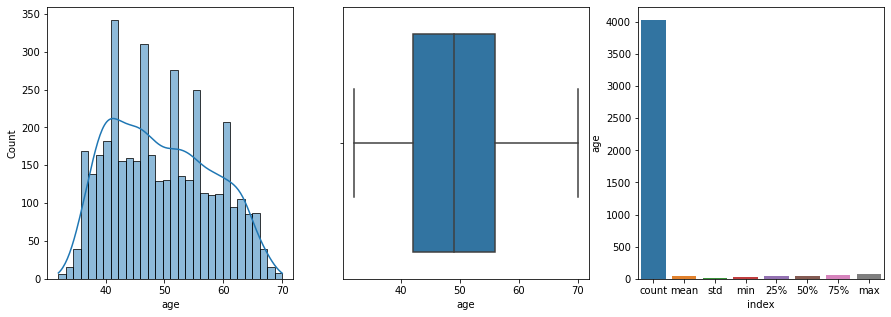

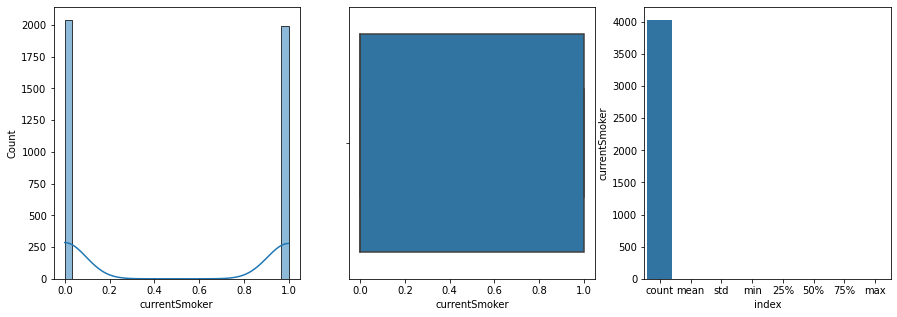

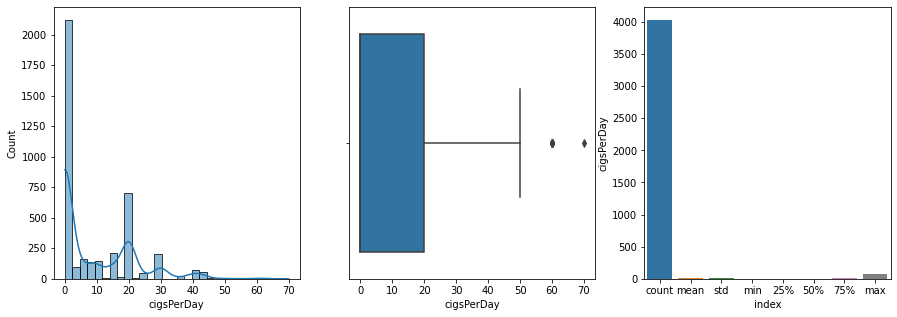

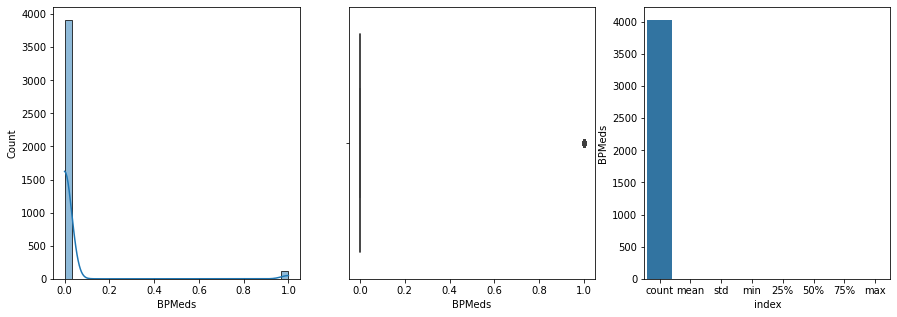

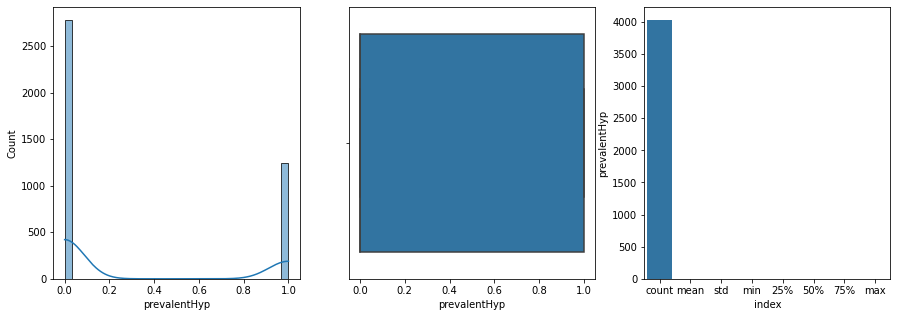

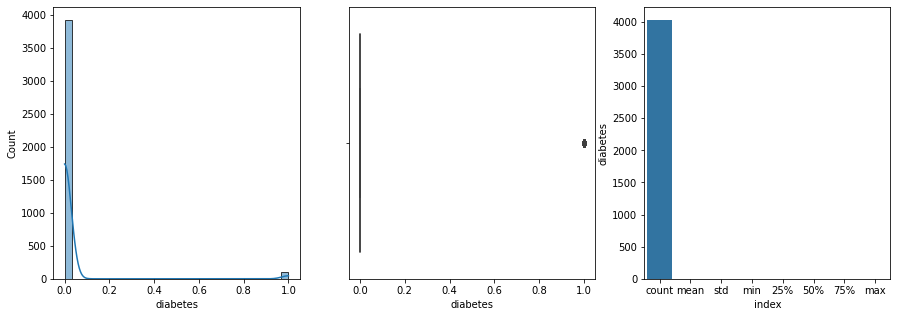

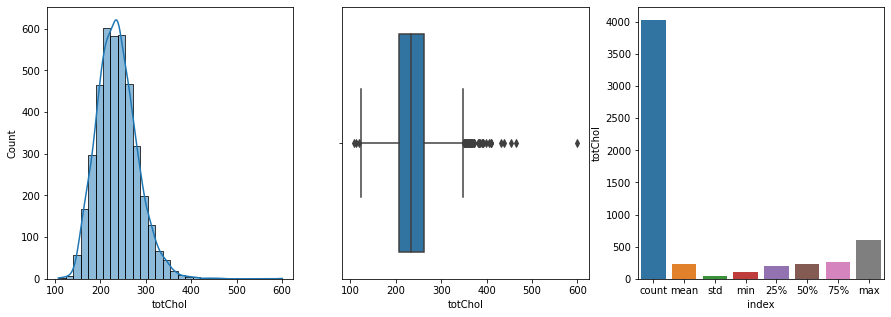

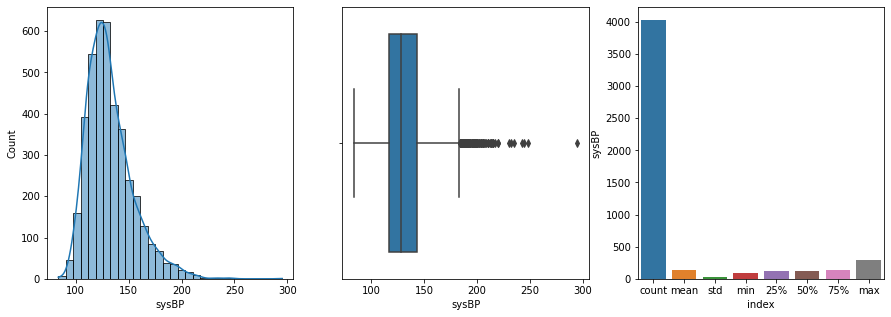

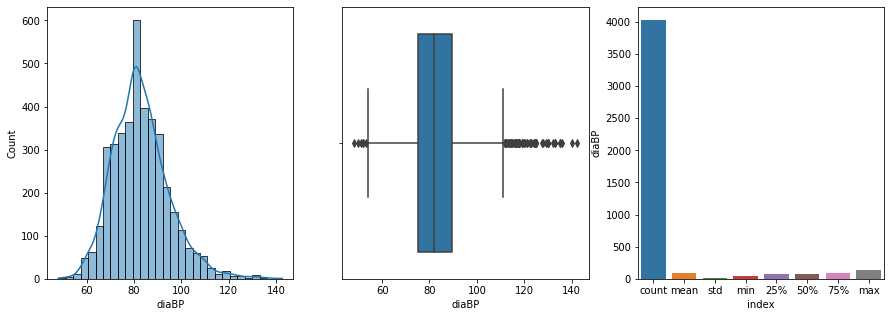

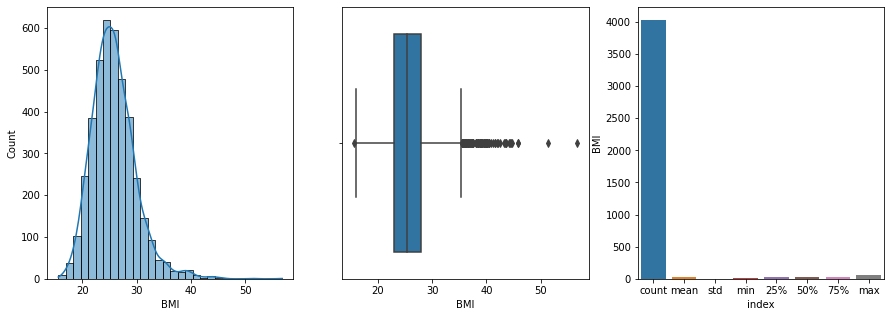

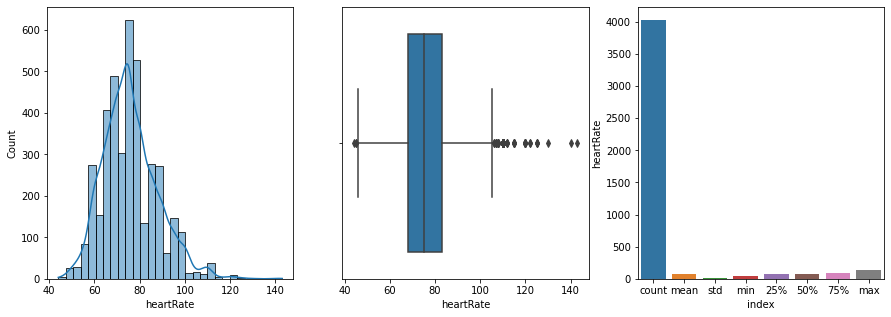

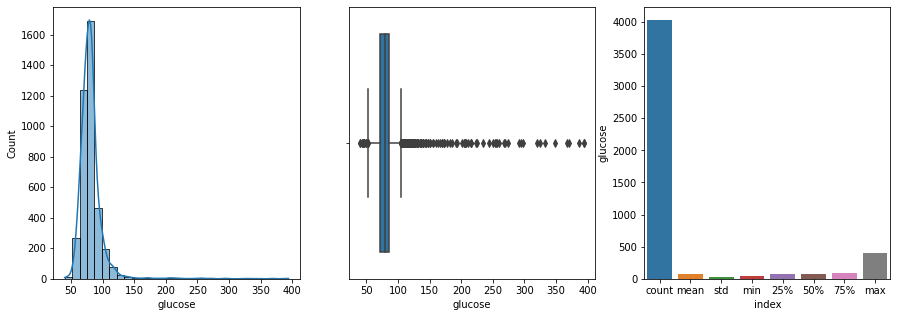

In [24]:
for col in numeric_columns:
    fig, axs = plt.subplots(1,3,figsize=(15,5))
    sns.histplot(data=numeric_columns, x=col, bins=30,kde=True, ax = axs[0])
    sns.boxplot(x=numeric_columns[col], ax=axs[1])
    sns.barplot(data= numeric_columns[col].describe().reset_index(), x='index', y=col, ax=axs[2])

<Axes: >

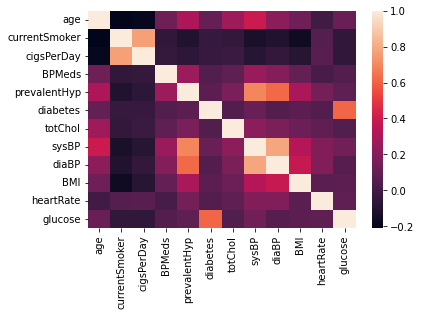

In [25]:
corr = df.corr()
sns.heatmap(corr)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4031 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4031 non-null   object 
 1   age              4031 non-null   int64  
 2   education        4031 non-null   object 
 3   currentSmoker    4031 non-null   int64  
 4   cigsPerDay       4031 non-null   float64
 5   BPMeds           4031 non-null   float64
 6   prevalentStroke  4031 non-null   object 
 7   prevalentHyp     4031 non-null   int64  
 8   diabetes         4031 non-null   int64  
 9   totChol          4031 non-null   float64
 10  sysBP            4031 non-null   float64
 11  diaBP            4031 non-null   float64
 12  BMI              4031 non-null   float64
 13  heartRate        4031 non-null   float64
 14  glucose          4031 non-null   float64
 15  Heart_ stroke    4031 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 664.4+ KB


In [27]:
df['education'].value_counts()

uneducated       1670
primaryschool    1226
graduate          671
postgraduate      464
Name: education, dtype: int64

In [28]:
from sklearn import preprocessing
l_enc = preprocessing.LabelEncoder()

In [29]:
df['education']= l_enc.fit_transform(df['education'])

In [30]:
df['education'].value_counts()

3    1670
2    1226
0     671
1     464
Name: education, dtype: int64

In [31]:
df['Heart_ stroke'] = l_enc.fit_transform(df['Heart_ stroke'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4031 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4031 non-null   object 
 1   age              4031 non-null   int64  
 2   education        4031 non-null   int32  
 3   currentSmoker    4031 non-null   int64  
 4   cigsPerDay       4031 non-null   float64
 5   BPMeds           4031 non-null   float64
 6   prevalentStroke  4031 non-null   object 
 7   prevalentHyp     4031 non-null   int64  
 8   diabetes         4031 non-null   int64  
 9   totChol          4031 non-null   float64
 10  sysBP            4031 non-null   float64
 11  diaBP            4031 non-null   float64
 12  BMI              4031 non-null   float64
 13  heartRate        4031 non-null   float64
 14  glucose          4031 non-null   float64
 15  Heart_ stroke    4031 non-null   int32  
dtypes: float64(8), int32(2), int64(4), object(2)
memory usage: 6

In [33]:
df['Gender']= l_enc.fit_transform(df['Gender'])

In [34]:
df['Gender'].value_counts()

0    2287
1    1744
Name: Gender, dtype: int64

In [35]:
df['prevalentStroke']= l_enc.fit_transform(df['prevalentStroke'])

In [36]:
df['prevalentStroke'].value_counts()

0    4007
1      24
Name: prevalentStroke, dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4031 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4031 non-null   int32  
 1   age              4031 non-null   int64  
 2   education        4031 non-null   int32  
 3   currentSmoker    4031 non-null   int64  
 4   cigsPerDay       4031 non-null   float64
 5   BPMeds           4031 non-null   float64
 6   prevalentStroke  4031 non-null   int32  
 7   prevalentHyp     4031 non-null   int64  
 8   diabetes         4031 non-null   int64  
 9   totChol          4031 non-null   float64
 10  sysBP            4031 non-null   float64
 11  diaBP            4031 non-null   float64
 12  BMI              4031 non-null   float64
 13  heartRate        4031 non-null   float64
 14  glucose          4031 non-null   float64
 15  Heart_ stroke    4031 non-null   int32  
dtypes: float64(8), int32(4), int64(4)
memory usage: 601.4 KB


In [38]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [39]:
X = df.drop(['Heart_ stroke'],axis=1)  #input
y = df['Heart_ stroke']  #output

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [41]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [42]:
accuracy = clf.score(X_test,y_test)

In [43]:
y_pred = clf.predict(X_test)

In [44]:
print(accuracy)

0.828996282527881


In [45]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn= KNeighborsClassifier()

In [46]:
clf_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
y_knn_pred = clf_knn.predict(X_test)

In [48]:
y_knn_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [49]:
knn_accuracy = clf_knn.score(X_test,y_test)

In [50]:
knn_accuracy

0.8302354399008675

In [51]:
from xgboost import XGBClassifier

In [52]:
XGBResampled = XGBClassifier()
XGBResampled.fit(X_train, y_train)
preds = XGBResampled.predict(X_test)
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100

print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))

XGBoost's prediction accuracy is: 82.65


              precision    recall  f1-score   support

           0       0.85      0.96      0.90       670
           1       0.47      0.16      0.24       137

    accuracy                           0.83       807
   macro avg       0.66      0.56      0.57       807
weighted avg       0.78      0.83      0.79       807



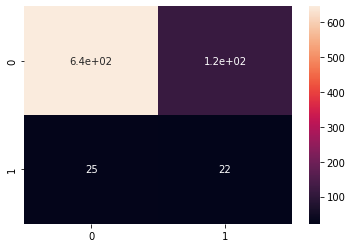

In [53]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(preds, y_test)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, preds))

# Attempting XGBoost with oversampling

In [54]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X,y)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 3424), (1, 3424)]


In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size = 0.2, random_state=42)

XGBResampled = XGBClassifier()
XGBResampled.fit(X_train, y_train)
preds = XGBResampled.predict(X_test)
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100

print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))

XGBoost's prediction accuracy is: 92.41


              precision    recall  f1-score   support

           0       0.97      0.88      0.92       701
           1       0.88      0.97      0.93       669

    accuracy                           0.92      1370
   macro avg       0.93      0.93      0.92      1370
weighted avg       0.93      0.92      0.92      1370



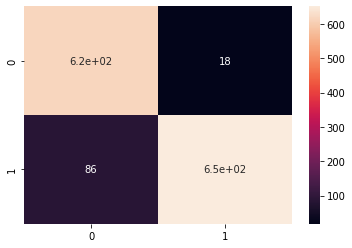

In [56]:
cm = confusion_matrix(preds, y_test)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, preds))